In [1]:
import plotly.graph_objects as go

# Define the touchpoints
touchpoints = ["Landing Page", "Product Page", "Cart", "Checkout", "Payment"]

# Number of users at each touchpoint (example data)
user_flow = [1000, 800, 600, 400, 350]
drop_offs = [0, 200, 200, 200, 50]

# Create source and target lists for Sankey diagram
sources = []
targets = []
values = []

# Populate the sources, targets, and values for continued interactions
for i in range(len(touchpoints) - 1):
    sources.append(i)
    targets.append(i + 1)
    values.append(user_flow[i + 1])

# Populate the sources, targets, and values for drop-offs
for i in range(len(touchpoints) - 1):
    sources.append(i)
    targets.append(len(touchpoints) + i)  # Drop-off nodes
    values.append(drop_offs[i + 1])

# Create labels including drop-off labels
labels = touchpoints + [f"Drop-off after {tp}" for tp in touchpoints[:-1]]

# Define the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=sources,  # Indices of the source nodes
        target=targets,  # Indices of the target nodes
        value=values,  # Number of users flowing between nodes
        color=["rgba(31, 119, 180, 0.8)"] * len(sources) + ["rgba(255, 0, 0, 0.4)"] * len(drop_offs)
    )
)])

# Set the layout of the diagram
fig.update_layout(title_text="Customer Journey with Drop-offs at Each Touchpoint", font_size=10)

# Display the Sankey diagram
fig.show()

In [3]:
# Define the touchpoints
touchpoints = ["Landing Page", "Product Page", "Cart", "Checkout", "Payment"]

# Number of users at each touchpoint (example data)
user_flow = [1000, 800, 600, 400, 350]

# Drop-offs at each stage
drop_offs = [0, 200, 200, 200, 50]

# Calculate conversion rates for each stage
conversion_rates = [f"{(user_flow[i] / user_flow[0]) * 100:.1f}%" for i in range(len(user_flow))]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=touchpoints,  # Labels for each stage
    x=user_flow,    # Number of users at each stage
    textinfo="value+percent previous+percent initial",  # Display the value and percentage
    # hoverinfo="label+percent previous+percent initial+text",
    textposition="inside",
    marker=dict(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
))

# Set the layout of the funnel chart
fig.update_layout(
    title="Customer Journey Funnel with Drop-offs",
    xaxis_title="Number of Users",
    yaxis_title="Touchpoints",
    yaxis=dict(categoryorder="total ascending"),
    font=dict(size=10)
)

# Display the funnel chart
fig.show()

In [16]:
import plotly.graph_objects as go

# Define the starting points and touchpoints
start_points = ["Email Campaign", "Social Media Ad", "Organic Search"]
touchpoints = ["Landing Page", "Product Page", "Cart", "Checkout", "Payment"]

# Define the flows of users from each starting point through the touchpoints
user_flows = {
    "Email Campaign": [500, 400, 300, 200, 150],
    "Social Media Ad": [300, 200, 150, 100, 80],
    "Organic Search": [200, 150, 100, 70, 60]
}

# Drop-offs for each touchpoint
drop_offs = {
    "Landing Page": [50, 30, 20],
    "Product Page": [40, 25, 15],
    "Cart": [30, 20, 10],
    "Checkout": [20, 15, 5]
}

# Create source, target, and values for Sankey diagram
sources = []
targets = []
values = []
# labels = start_points + touchpoints + [f"Drop-off after {tp}" for tp in touchpoints[:-1]]
labels = start_points + touchpoints + ["Drop-off after"]

# Map starting points to the first touchpoint
for i, start in enumerate(start_points):
    sources.append(i)  # Starting points as sources
    targets.append(len(start_points))  # First touchpoint as target
    values.append(user_flows[start][0])

# Map flows between touchpoints
for i, tp in enumerate(touchpoints[:-1]):
    for j, start in enumerate(start_points):
        sources.append(len(start_points) + i)  # Current touchpoint as source
        targets.append(len(start_points) + i + 1)  # Next touchpoint as target
        values.append(user_flows[start][i + 1])

# Map drop-offs
for i, tp in enumerate(touchpoints[:-1]):
    for j, start in enumerate(start_points):
        sources.append(len(start_points) + i)  # Current touchpoint as source
        targets.append(len(start_points) + len(touchpoints))  # Drop-off as target
        values.append(drop_offs[tp][j])

# Define the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=sources,  # Indices of the source nodes
        target=targets,  # Indices of the target nodes
        value=values,  # Number of users flowing between nodes
        color=["rgba(31, 119, 180, 0.8)"] * 15 + ["rgba(255, 0, 0, 0.4)"] * 12
    )
)])

# Set the layout of the diagram
fig.update_layout(title_text="Multi-Source Customer Journey with Drop-offs", font_size=10)

# Display the Sankey diagram
fig.show()

In [20]:
import plotly.graph_objects as go

# Define the starting points and touchpoints
start_points = ["Email Campaign", "Social Media Ad", "Organic Search"]
touchpoints = ["Landing Page", "Product Page", "Cart", "Checkout", "Payment"]

# Define the flows of users from each starting point through the touchpoints
user_flows = {
    "Email Campaign": [500, 400, 100, 50, 20],
    "Social Media Ad": [300, 200, 150, 100, 80],
    "Organic Search": [200, 150, 100, 70, 60]
}

# Drop-offs for each touchpoint
drop_offs = {
    "Landing Page": [50, 180, 20],
    "Product Page": [0,0,400],
    "Cart": [30, 20, 10],
    "Checkout": [20, 15, 5]
}

# Create source, target, values, and color for the Sankey diagram
sources = []
targets = []
values = []
colors = []
labels = start_points + touchpoints + [f"Drop-off after {tp}" for tp in touchpoints[:-1]]

# Define colors for each source
source_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Map starting points to the first touchpoint
for i, start in enumerate(start_points):
    sources.append(i)  # Starting points as sources
    targets.append(len(start_points))  # First touchpoint as target
    values.append(user_flows[start][0])
    colors.append(source_colors[i])  # Assign color to the flow

# Map flows between touchpoints
for i, tp in enumerate(touchpoints[:-1]):
    for j, start in enumerate(start_points):
        sources.append(len(start_points) + i)  # Current touchpoint as source
        targets.append(len(start_points) + i + 1)  # Next touchpoint as target
        values.append(user_flows[start][i + 1])
        colors.append(source_colors[j])  # Maintain the same color

# Map drop-offs
for i, tp in enumerate(touchpoints[:-1]):
    for j, start in enumerate(start_points):
        sources.append(len(start_points) + i)  # Current touchpoint as source
        targets.append(len(start_points) + len(touchpoints) + i)  # Drop-off as target
        values.append(drop_offs[tp][j])
        colors.append("rgba(255, 0, 0, 0.4)")  # Drop-offs in semi-transparent red

# Define the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=sources,  # Indices of the source nodes
        target=targets,  # Indices of the target nodes
        value=values,  # Number of users flowing between nodes
        color=colors  # Color for each flow
    )
)])

# Set the layout of the diagram
fig.update_layout(title_text="Multi-Source Customer Journey with Drop-offs", font_size=10)

# Display the Sankey diagram
fig.show()

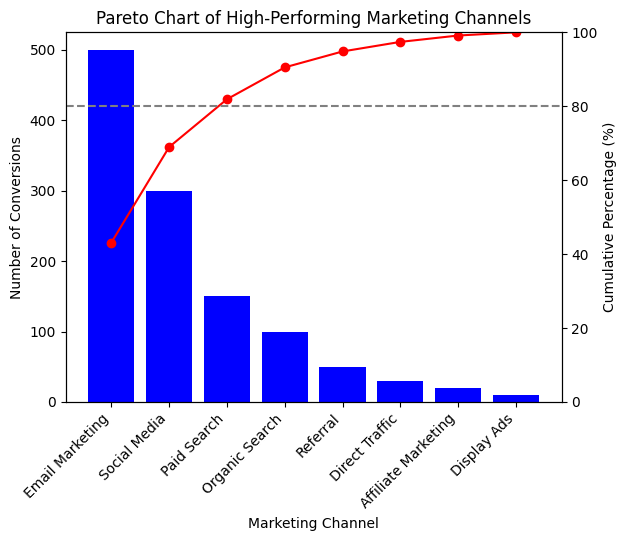

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for marketing channels
data = {
    'Channel': [
        'Email Marketing', 'Social Media', 'Paid Search',
        'Organic Search', 'Referral', 'Direct Traffic',
        'Affiliate Marketing', 'Display Ads'
    ],
    'Conversions': [500, 300, 150, 100, 50, 30, 20, 10]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by Conversions in descending order
df = df.sort_values(by='Conversions', ascending=False)

# Calculate the cumulative percentage
df['Cumulative Percentage'] = df['Conversions'].cumsum() / df['Conversions'].sum() * 100

# Plotting the Pareto chart
fig, ax = plt.subplots()

# Bar plot for conversions
ax.bar(df['Channel'], df['Conversions'], color='blue')

# rotate x labels
plt.xticks(rotation=45, ha="right")

# Line plot for cumulative percentage
ax2 = ax.twinx()
ax2.plot(df['Channel'], df['Cumulative Percentage'], color='red', marker='o')

# ax2 start at 0
ax2.set_ylim(0, 100)

# Adding title and labels
ax.set_title('Pareto Chart of High-Performing Marketing Channels')
ax.set_xlabel('Marketing Channel')
ax.set_ylabel('Number of Conversions')
ax2.set_ylabel('Cumulative Percentage (%)')

# Adding threshold line for 80%
ax2.axhline(80, color='gray', linestyle='--')

# Display the plot
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
segments = ['Segment A', 'Segment B', 'Segment C']
categories = ['Average Age', 'Purchase Frequency', 'Order Value', 'Loyalty Score']

# Data for each segment
segment_data = {
    'Segment A': [35, 5, 150, 80],
    'Segment B': [42, 3, 120, 90],
    'Segment C': [28, 7, 100, 70]
}

# normalize segment data
for segment in segments:
    segment_mean = np.mean(segment_data[segment])
    segment_sd = np.std(segment_data[segment])
    segment_data[segment] = [(x - segment_mean) / segment_sd for x in segment_data[segment]]

# Number of variables we're plotting
num_vars = len(categories)

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is circular, so we need to "complete the loop"
# and append the start point to the end.
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each segment
for segment in segments:
    values = segment_data[segment]
    values += values[:1]  # complete the loop for the segment data
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=segment)
    ax.fill(angles, values, alpha=0.25)

# Labels and title
# ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Customer Segmentation Radar Chart', size=20, color='blue', y=1.1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

In [18]:
segment_data = {
    'Segment A': [35, 5, 150, 80],
    'Segment B': [42, 3, 120, 90],
    'Segment C': [28, 7, 100, 70]
}

In [27]:
segment_data

{'Segment A': [0.0, 0.0, 1.0596258856520353, 0.0],
 'Segment B': [1.0, -1.0, -0.1324532357065042, 1.0],
 'Segment C': [-1.0, 1.0, -0.9271726499455305, -1.0]}

In [28]:
segment_mean

[35.0, 5.0, 123.33333333333333, 80.0]

In [34]:
import plotly.graph_objects as go

# Sample data for customer segments
categories = ['Average Age', 'Purchase Frequency', 'Order Value', 'Loyalty Score']
segment_data = {
    'Segment A': [35, 5, 150, 80],
    'Segment B': [42, 3, 120, 90],
    'Segment C': [28, 7, 100, 70]
}

segment_mean = list(pd.DataFrame(segment_data).mean(axis=1))
segment_std = list(pd.DataFrame(segment_data).std(axis=1))

for segment in segment_data:
    for i in range(len(segment_data[segment])):
        segment_data[segment][i] = (segment_data[segment][i] - segment_mean[i]) / segment_std[i]

# Create radar chart
fig = go.Figure()

# Add traces for each segment
for segment, values in segment_data.items():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name=segment
    ))

# Update layout for better appearance
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]
        )),
    showlegend=True,
    title="Customer Segmentation Radar Chart",
    margin=dict(l=20, r=20, t=50, b=20),  # Adjust margin
    width=800,  # Increase width
    height=600  # Increase height
)

# Show the plot
fig.show()

In [26]:
segment_data

{'Segment A': [0.0, 0.0, 1.0596258856520353, 0.0],
 'Segment B': [1.0, -1.0, -0.1324532357065042, 1.0],
 'Segment C': [-1.0, 1.0, -0.9271726499455305, -1.0]}